In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import math
import pandas as pd


In [2]:
def plot(space, *functions, points=None, title=None):
    plt.rcParams['figure.figsize'] = [9, 6]

    if points != None:
        plt.scatter(points[0], points[1], label="nodes")
    for foo, lbl, line in functions:
        plt.plot(space, foo(space), line, label=lbl)

    if title:
        plt.title(title)

    plt.legend(bbox_to_anchor=(0.85, 0.23), loc='upper left', borderaxespad=0)
    plt.grid()
    plt.show()

In [3]:
def f(x):
    k = 1
    m = 2
    return -k * x * math.sin(m*(x-1))
f = np.vectorize(f)
a = -3 * math.pi + 1
b = 2 * math.pi + 1
x_space = np.linspace(a, b, 1000)

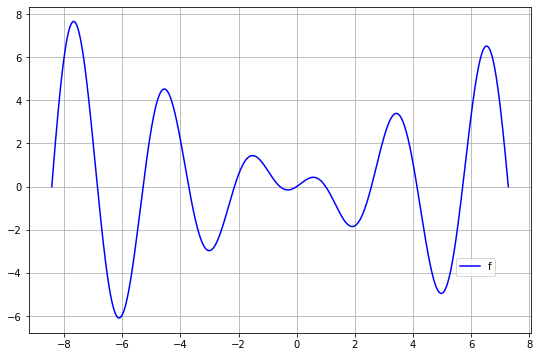

In [4]:
plot(x_space, [f, 'f', 'b-'])

In [5]:
def no_weight_least_squares_approximation(xs, ys, m):
    n = len(xs)
    if n != len(ys):
        raise ValueError('xs and ys not the same length')
    
    A = np.array([[xs[i] ** j for j in range(1,m+1)] for i in range(n)])
    B = np.array([[ys[i]] for i in range(n)])
    
    lse_coeffs = inv(np.transpose(A) @ A) @ np.transpose(A) @ B
    print(lse_coeffs)
    
    return lambda x: sum(lse_coeffs[i] * x ** i for i in range(m))

In [6]:
def get_norm(y1, y2, mode):
    n = len(y1)
    if mode == 'max':
        return max([abs(y1[i] - y2[i]) for i in range(n)])
    elif mode == 'sse':
        return sum([(y1[i] - y2[i])**2 for i in range(n)])

In [7]:
def least_squares_approx(xs, ys, ws, m):
    n = len(xs)
    G = np.zeros((m,m), float)
    B = np.zeros(m, float)
    
    for i in range(m):
        for j in range(m):
            G[i][j] = sum(ws[k] * xs[k] ** (i+j) for k in range(n))
        B[i] = sum(ws[k] * ys[k] * xs[k] ** i for k in range(n))
        
    A = np.linalg.solve(G, B)
    return lambda x: sum(A[i] * x ** i for i in range(m))


In [8]:
res = [['Liczba węzłów', "stopień wielomianu", 'sse', 'max']]

In [9]:
def save(filename, results):
    filename += '.xlsx'
    df = pd.DataFrame(data=results)
    print(df)
    df.to_csv(filename, index=False, header=False)
    return df

In [10]:
def update_df():
    r = [n, m]
    r.append(get_norm(F(x_space), f(x_space), "sse"))
    r.append(get_norm(F(x_space), f(x_space), "max"))
    res.append(r)

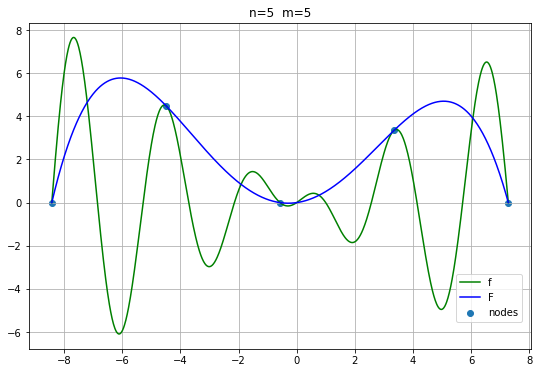

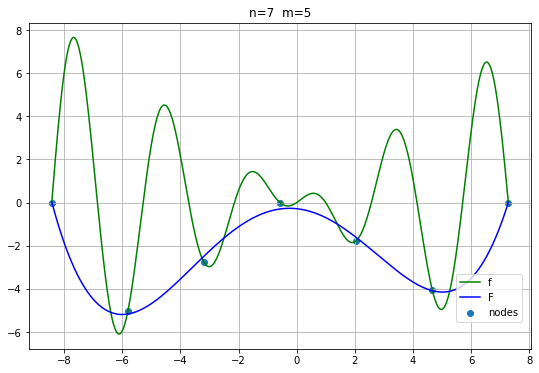

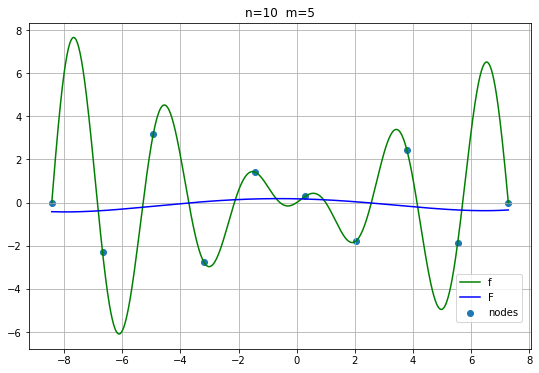

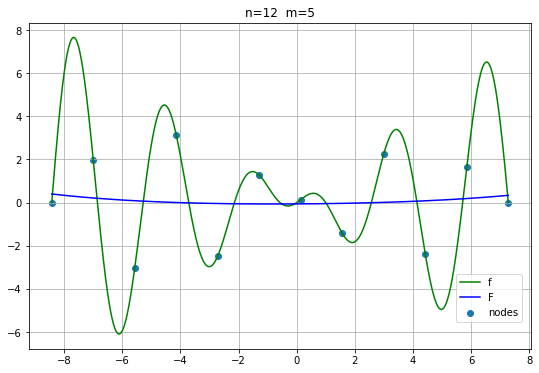

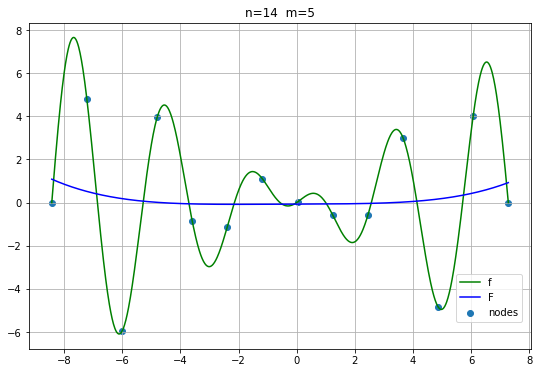

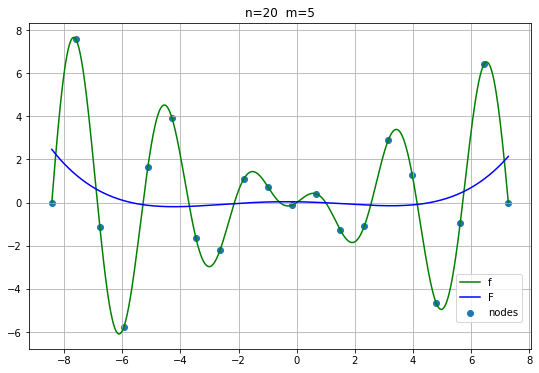

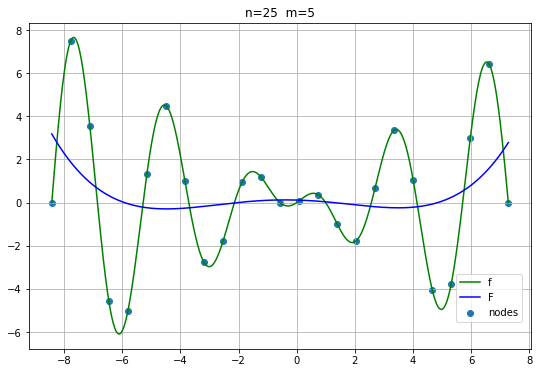

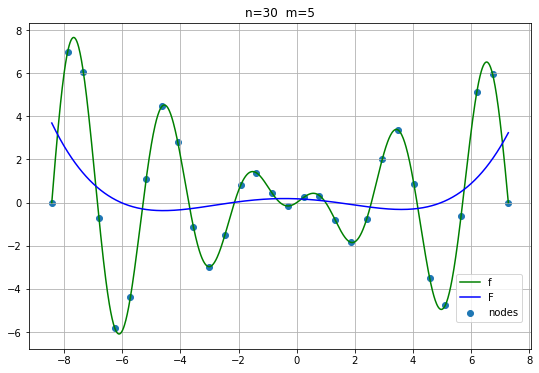

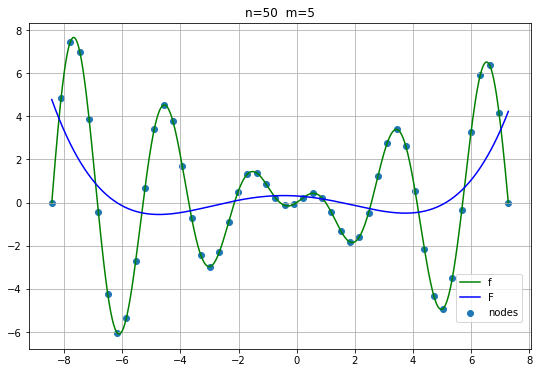

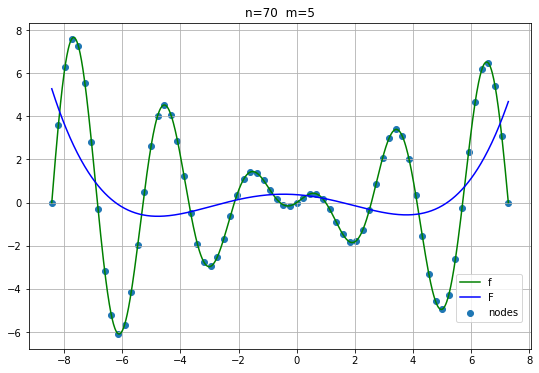

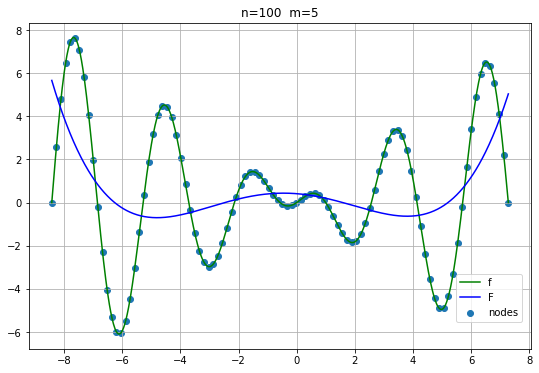

In [11]:
for n in [5, 7, 10, 12, 14, 20, 25, 30, 50, 70, 100]:
    
    xs = np.linspace(a, b, n)
    ys = f(xs)
    ws = [1 for _ in range(n)]
    m = 5
    
    F = least_squares_approx(xs, ys, ws, m)
    
    r = [n, m]
    r.append(get_norm(F(x_space), f(x_space), "sse"))
    r.append(get_norm(F(x_space), f(x_space), "max"))
    res.append(r)
    
    plot(x_space, [f, "f", "g-"], [F, "F", "b-"], points=[xs, f(xs)], title=f"n={n}  m={m}")
    

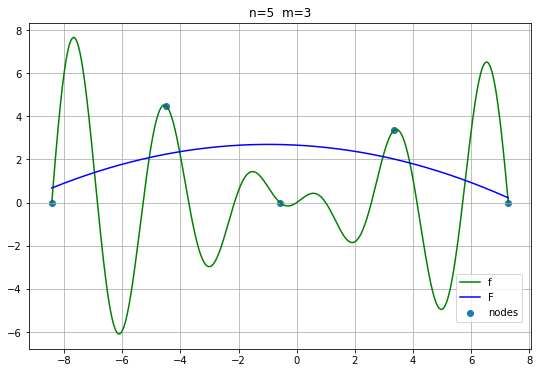

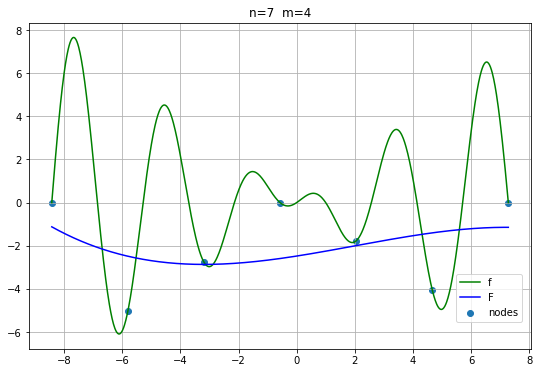

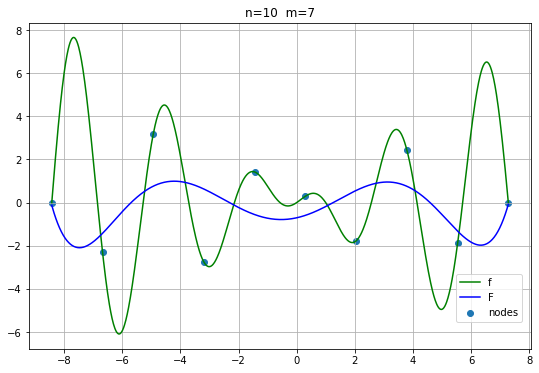

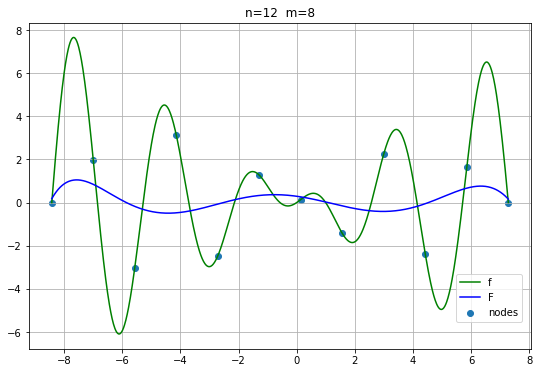

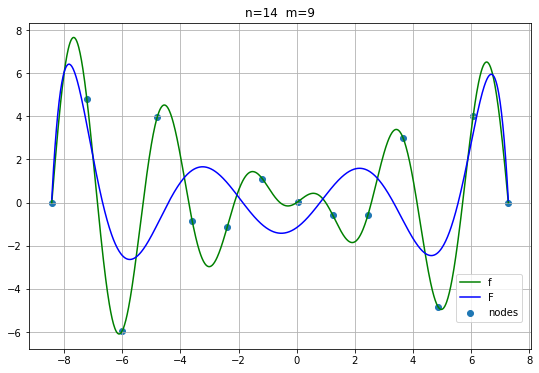

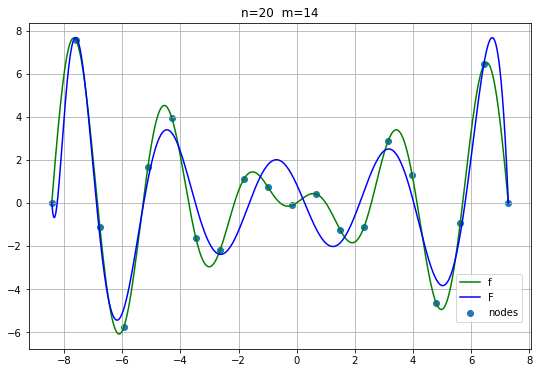

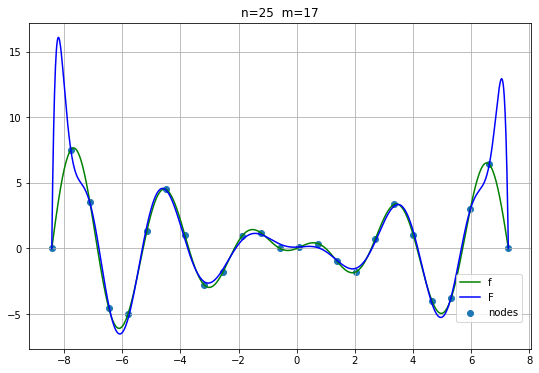

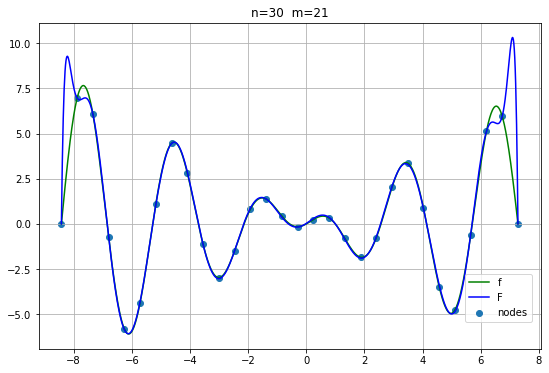

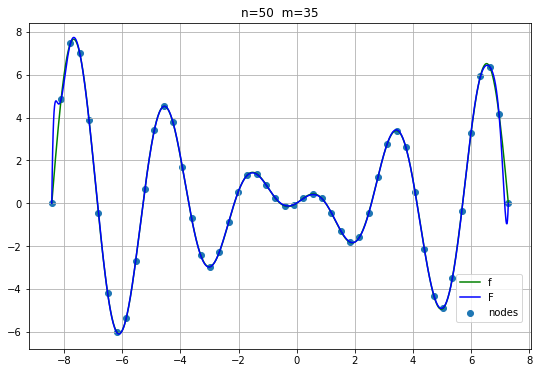

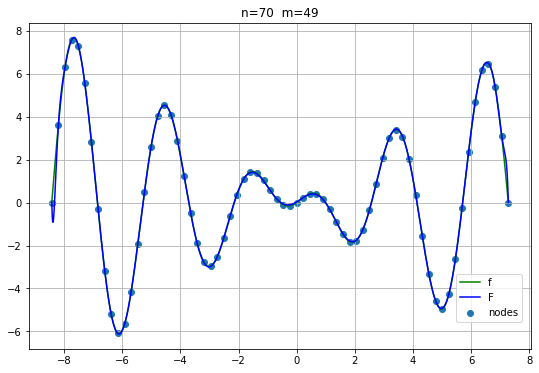

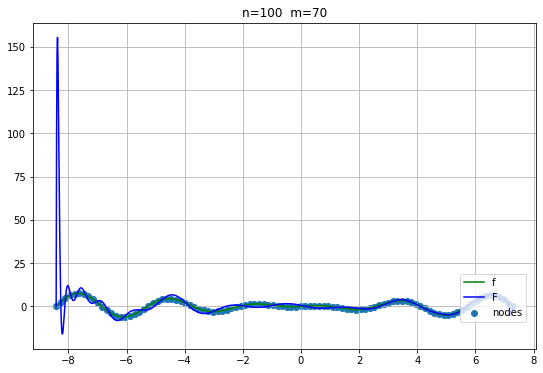

In [12]:
for n in [5, 7, 10, 12, 14, 20, 25, 30, 50, 70, 100]:
    xs = np.linspace(a, b, n)
    ys = f(xs)
    ws = [1 for _ in range(n)]
    m = math.floor(n * 0.7)

    F = least_squares_approx(xs, ys, ws, m)
        
    r = [n, m]
    r.append(get_norm(F(x_space), f(x_space), "sse"))
    r.append(get_norm(F(x_space), f(x_space), "max"))
    res.append(r)
    
    plot(x_space, [f, "f", "g-"], [F, "F", "b-"], points=[xs, f(xs)], title=f"n={n}  m={m}")

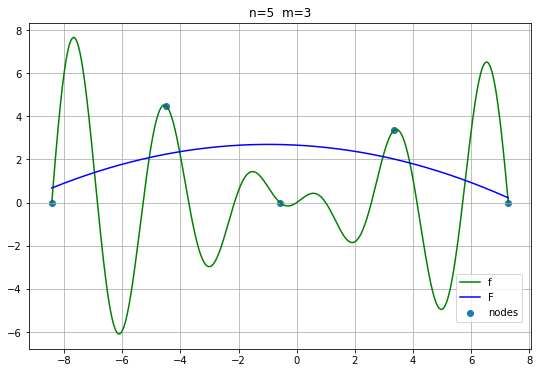

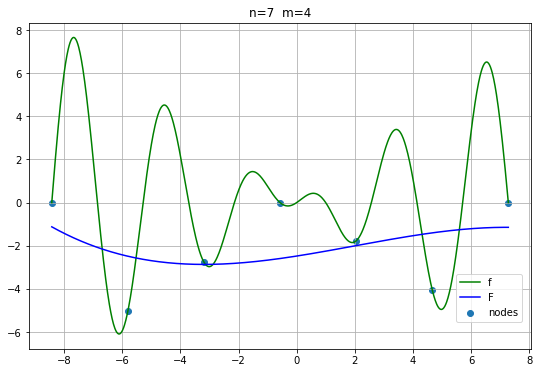

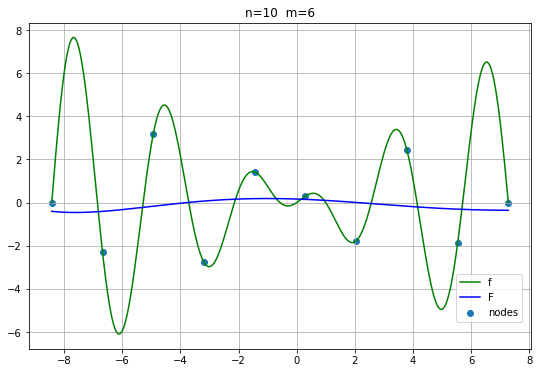

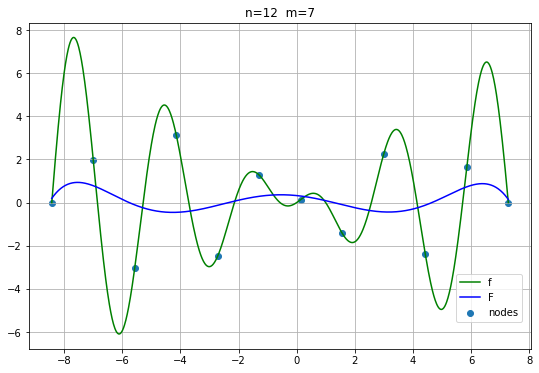

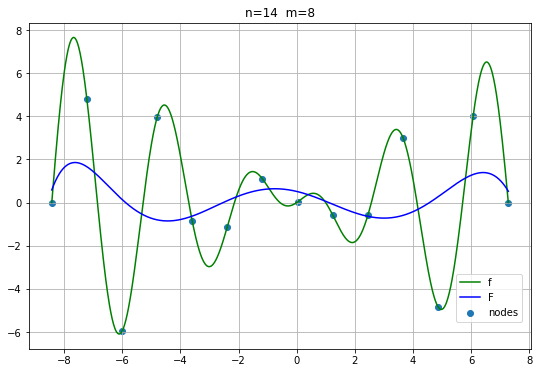

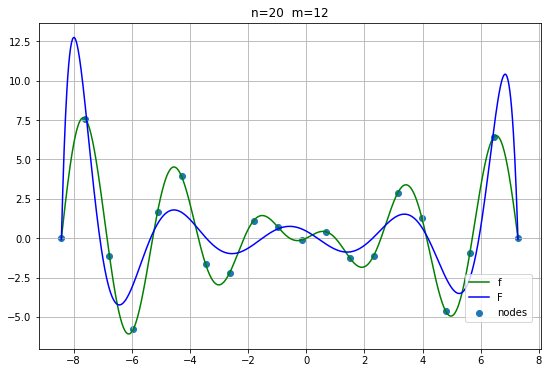

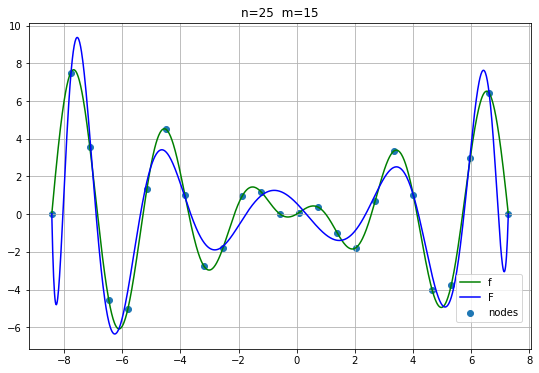

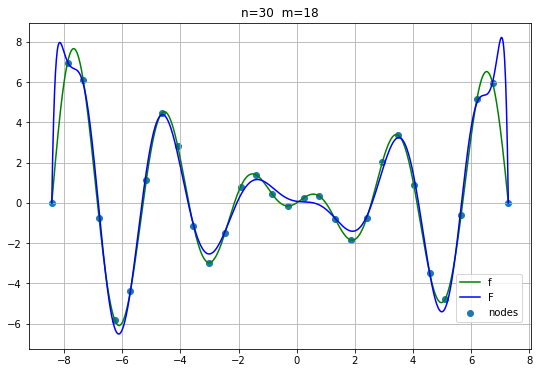

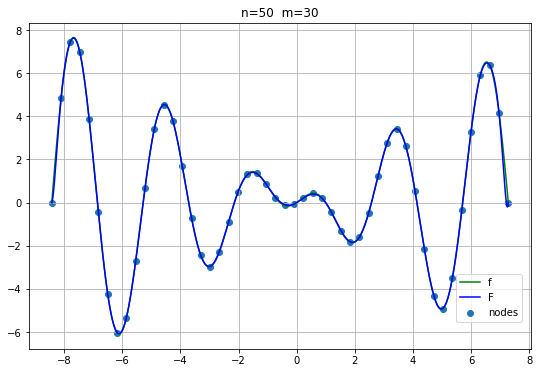

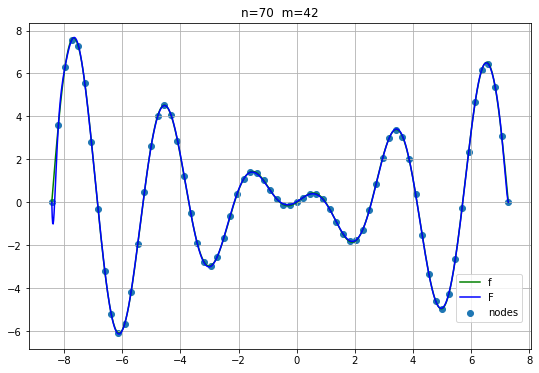

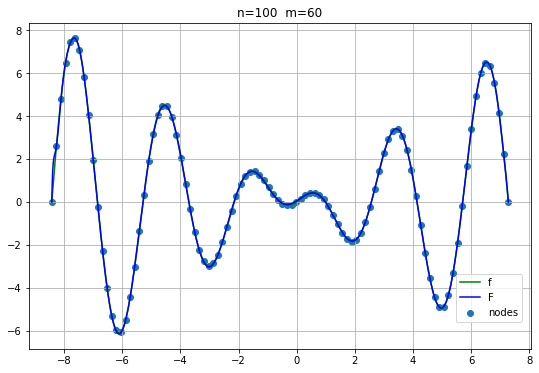

In [13]:
for n in [5, 7, 10, 12, 14, 20, 25, 30, 50, 70, 100]:
    xs = np.linspace(a, b, n)
    ys = f(xs)
    ws = [1 for _ in range(n)]
    m = math.floor(n * 0.6)

    F = least_squares_approx(xs, ys, ws, m)
        
    r = [n, m]
    r.append(get_norm(F(x_space), f(x_space), "sse"))
    r.append(get_norm(F(x_space), f(x_space), "max"))
    res.append(r)
    
    plot(x_space, [f, "f", "g-"], [F, "F", "b-"], points=[xs, f(xs)], title=f"n={n}  m={m}")

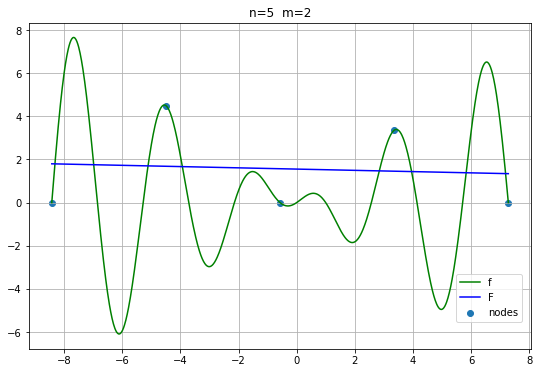

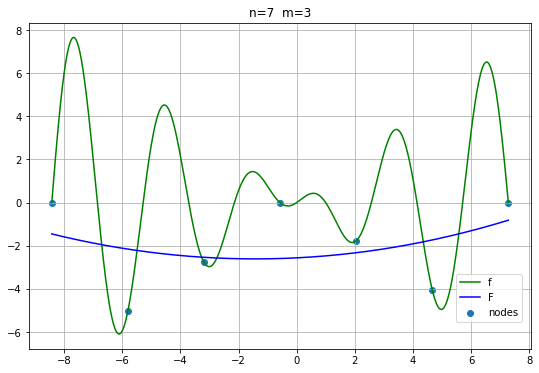

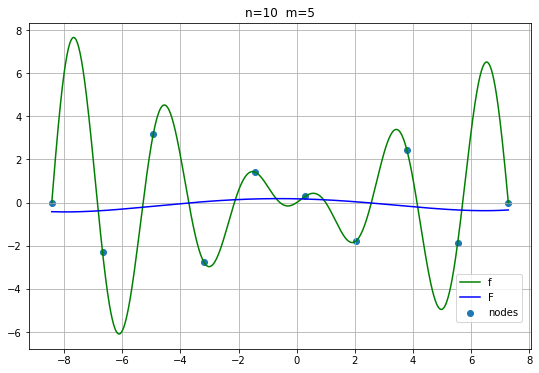

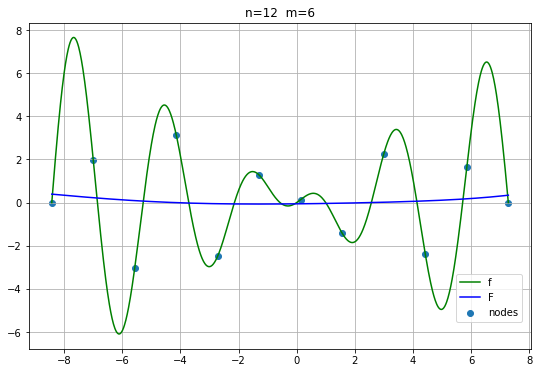

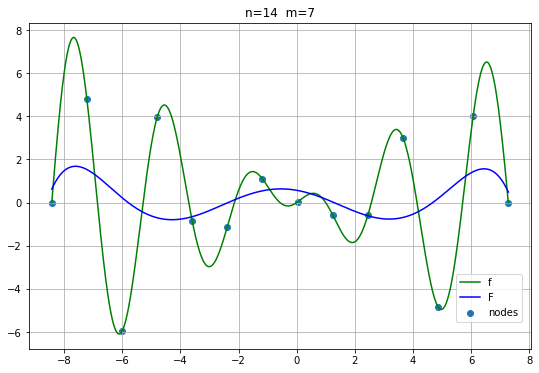

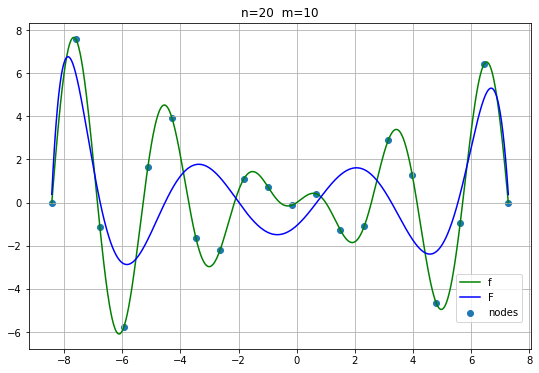

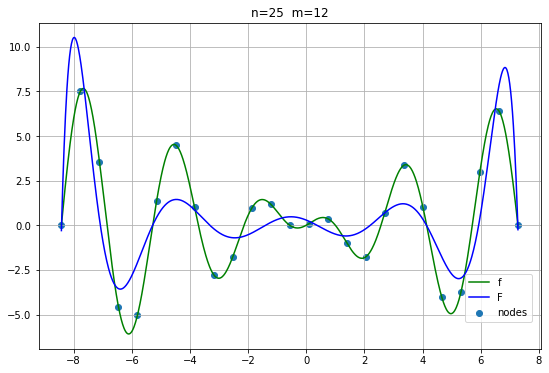

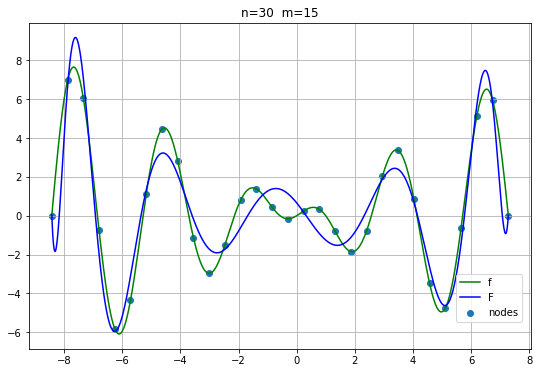

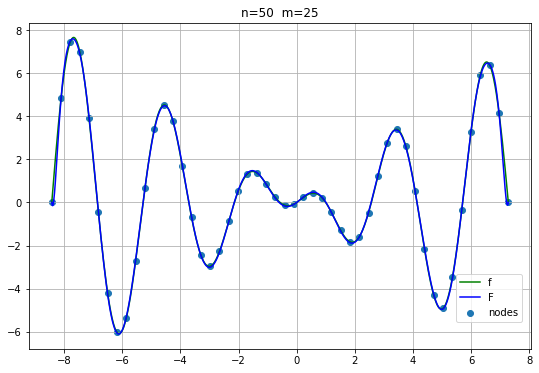

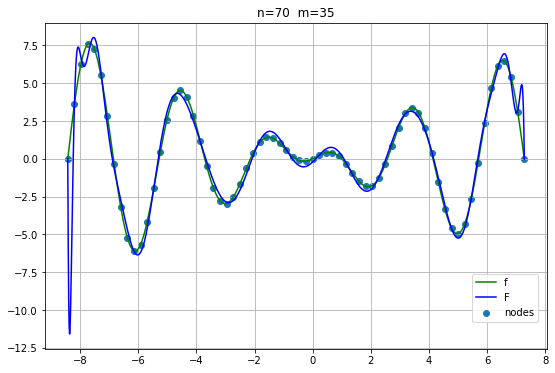

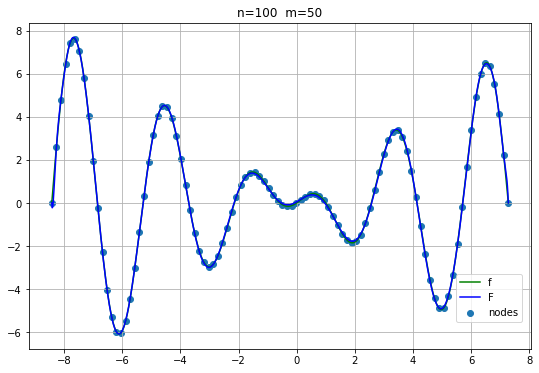

In [14]:
for n in [5, 7, 10, 12, 14, 20, 25, 30, 50, 70, 100]:
    xs = np.linspace(a, b, n)
    ys = f(xs)
    ws = [1 for _ in range(n)]
    m = math.floor(n * 0.5)

    F = least_squares_approx(xs, ys, ws, m)
        
    r = [n, m]
    r.append(get_norm(F(x_space), f(x_space), "sse"))
    r.append(get_norm(F(x_space), f(x_space), "max"))
    res.append(r)
    
    plot(x_space, [f, "f", "g-"], [F, "F", "b-"], points=[xs, f(xs)], title=f"n={n}  m={m}")

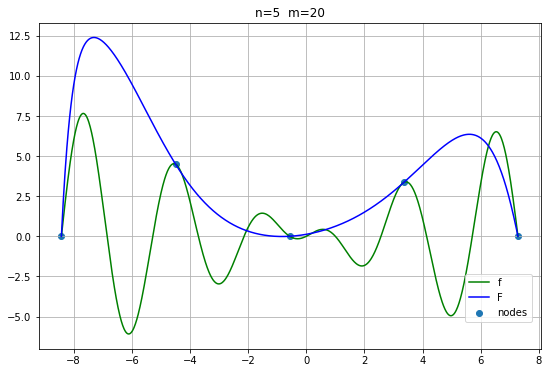

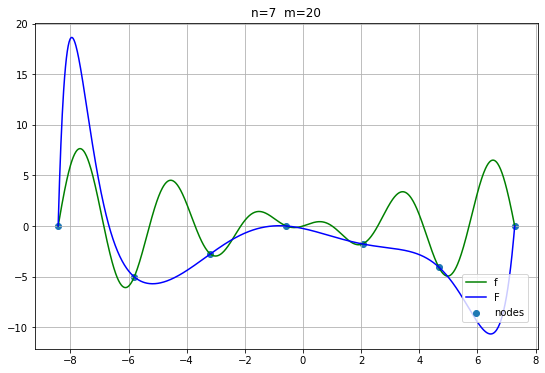

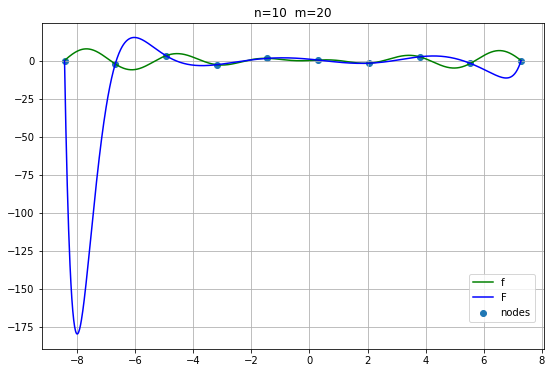

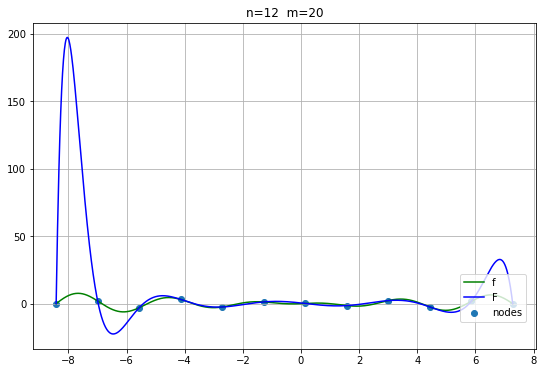

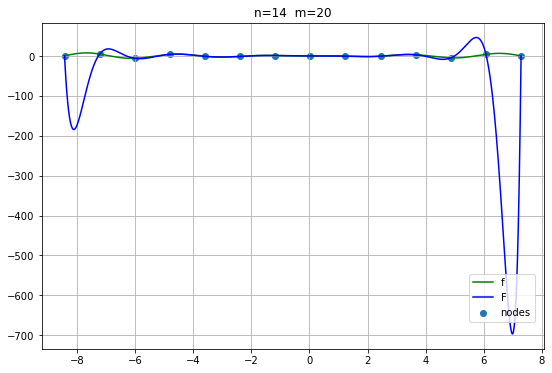

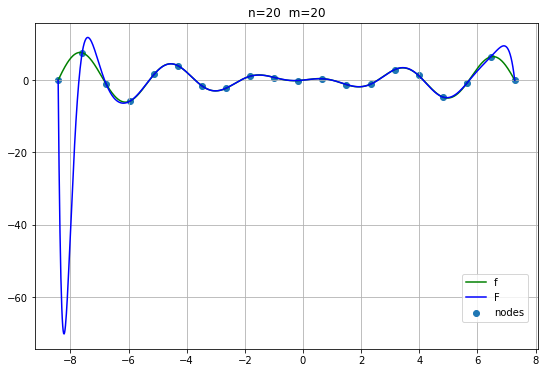

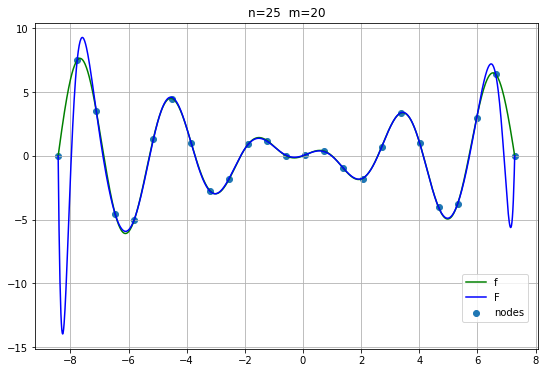

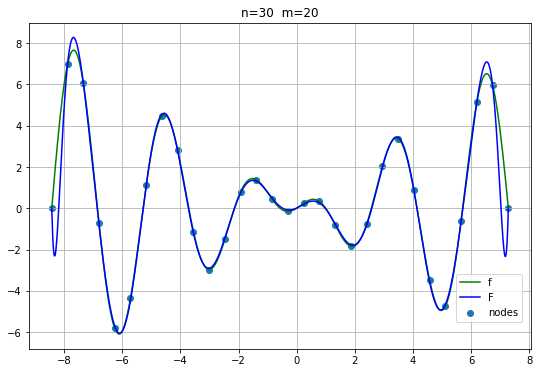

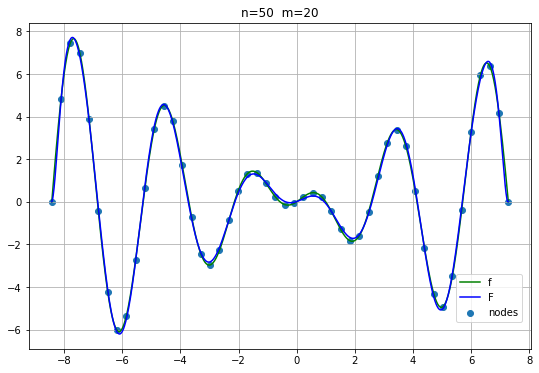

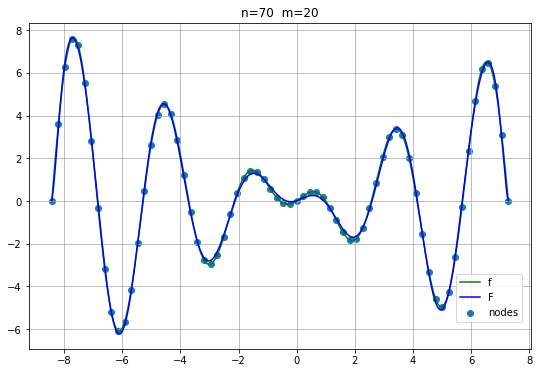

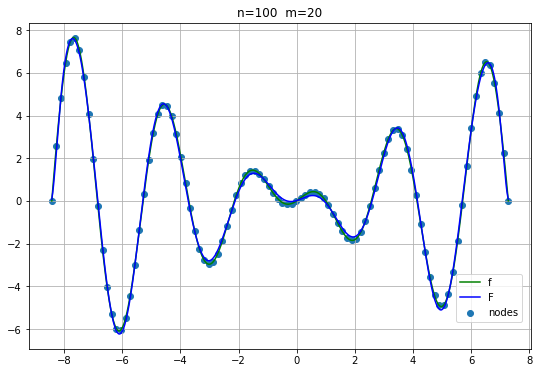

In [15]:
for n in [5, 7, 10, 12, 14, 20, 25, 30, 50, 70, 100]:
    xs = np.linspace(a, b, n)
    ys = f(xs)
    ws = [1 for _ in range(n)]
    m = 20

    F = least_squares_approx(xs, ys, ws, m)
        
    r = [n, m]
    r.append(get_norm(F(x_space), f(x_space), "sse"))
    r.append(get_norm(F(x_space), f(x_space), "max"))
    res.append(r)
    
    plot(x_space, [f, "f", "g-"], [F, "F", "b-"], points=[xs, f(xs)], title=f"n={n}  m={m}")

In [16]:
df = save('result', res)

                0                   1                2           3
0   Liczba węzłów  stopień wielomianu              sse         max
1               5                   5     20527.745781   11.863977
2               7                   5     20642.685297   10.765484
3              10                   5     10843.750293    8.083239
4              12                   5     10037.369499    7.361869
5              14                   5      9550.141945    6.958586
6              20                   5      8753.656051    6.296826
7              25                   5      8429.513077    6.191217
8              30                   5      8237.269987    6.143382
9              50                   5      7929.252995    6.038167
10             70                   5      7836.692179    5.990597
11            100                   5      7786.150828    5.954549
12              5                   3     14094.671465    7.829595
13              7                   4     16321.010532    9.29

In [17]:
df.columns = res[0]
df = df.drop(0)

In [18]:
dfm = pd.DataFrame()
dfm['idx'] = "n= " + df[df.columns[0]].astype(str) + ";  m= "+ df[df.columns[1]].astype(str)
dfm['sse'] = df['sse']
dfm['max'] = df['max']

In [19]:
dfm[1:5].idx

2     n= 7;  m= 5
3    n= 10;  m= 5
4    n= 12;  m= 5
5    n= 14;  m= 5
Name: idx, dtype: object

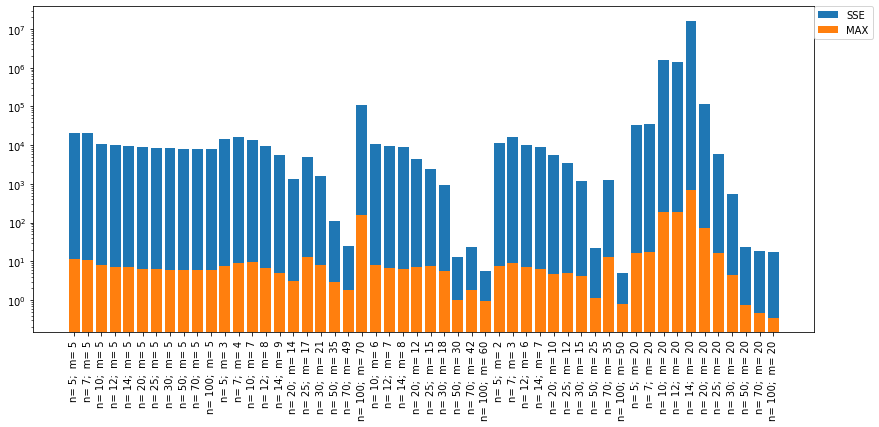

In [24]:
plt.rcParams['figure.figsize'] = [14, 6]
# for i in range(5):
#     plt.bar(dfm[i*11: (i+1) * (11)].idx, dfm[i*11: (i+1)*(11)].sse, label="SSE")
#     plt.bar(dfm[i*11: (i+1) * (11)].idx, dfm[i*11: (i+1)*(11)]['max'], label="MAX")
plt.bar(dfm.idx, dfm.sse, label="SSE")
plt.bar(dfm.idx, dfm['max'], label="MAX")
plt.xticks(rotation=90)
plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)

plt.show()

